# **Рубежный контроль №1**
## Киреев Андрей ИУ5-64Б
### Задача №1.
Для заданного набора данных (googleplaystore.csv) проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Для студентов группы ИУ5-64Б, ИУ5Ц-84Б - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

Загрузка библиотек:

In [147]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка датасета:

In [148]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/googleplaystore.csv")

In [149]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Количество строк/столбцов:

In [150]:
data.shape

(10841, 13)

Проверка на наличие пропусков:

In [151]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Т.к. пропусков не много, а нам нужен чистый датасет, то удалим нулевые строки:

In [152]:
data = data.dropna(axis=0)
data.shape

(9360, 13)

In [153]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Определим типы столбцов:

In [154]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Будем использовать в качестве целевого признака переменную Rating

Приведем некоторые категориальные признаки к числовому формату:

In [155]:
#Преобразование Reviews
arr_before = []
arr_after = []
for i in range(data.shape[0]):
    arr_before.append(data["Reviews"].iloc[i])
    data["Reviews"].iloc[i] = int(data["Reviews"].iloc[i])
    arr_after.append(data["Reviews"].iloc[i])
print("До кодирования:")
print(arr_before[:50])
print("После кодирования:")
print(arr_after[:50])

data = data.astype({"Reviews": "int64"})

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


До кодирования:
['159', '967', '87510', '215644', '967', '167', '178', '36815', '13791', '121', '13880', '8788', '44829', '4326', '1518', '3632', '27', '194216', '224399', '450', '654', '7699', '118', '192', '20260', '203', '136', '223', '1120', '227', '5035', '1015', '353', '564', '8145', '36639', '158', '591', '117', '176', '295221', '2206', '26', '174531', '1070', '85', '845', '367', '1598', '284']
После кодирования:
[159, 967, 87510, 215644, 967, 167, 178, 36815, 13791, 121, 13880, 8788, 44829, 4326, 1518, 3632, 27, 194216, 224399, 450, 654, 7699, 118, 192, 20260, 203, 136, 223, 1120, 227, 5035, 1015, 353, 564, 8145, 36639, 158, 591, 117, 176, 295221, 2206, 26, 174531, 1070, 85, 845, 367, 1598, 284]


In [156]:
#Преобразование Installs
arr_before = []
arr_after = []
for i in range(data.shape[0]):
    str = data["Installs"].iloc[i][:-1]
    arr_before.append(str)
    data["Installs"].iloc[i] = int(str.replace(",", ""))
    arr_after.append(data["Installs"].iloc[i])
print("До кодирования:")
print(arr_before[:50])
print("После кодирования:")
print(arr_after[:50])
data = data.astype({"Installs": "int64"})

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


До кодирования:
['10,000', '500,000', '5,000,000', '50,000,000', '100,000', '50,000', '50,000', '1,000,000', '1,000,000', '10,000', '1,000,000', '1,000,000', '10,000,000', '100,000', '100,000', '500,000', '10,000', '5,000,000', '10,000,000', '100,000', '100,000', '500,000', '50,000', '10,000', '500,000', '100,000', '10,000', '100,000', '100,000', '50,000', '100,000', '100,000', '10,000', '100,000', '500,000', '5,000,000', '10,000', '500,000', '10,000', '100,000', '10,000,000', '100,000', '10,000', '10,000,000', '100,000', '100,000', '100,000', '100,000', '1,000,000', '100,000']
После кодирования:
[10000, 500000, 5000000, 50000000, 100000, 50000, 50000, 1000000, 1000000, 10000, 1000000, 1000000, 10000000, 100000, 100000, 500000, 10000, 5000000, 10000000, 100000, 100000, 500000, 50000, 10000, 500000, 100000, 10000, 100000, 100000, 50000, 100000, 100000, 10000, 100000, 500000, 5000000, 10000, 500000, 10000, 100000, 10000000, 100000, 10000, 10000000, 100000, 100000, 100000, 100000, 1000000

In [157]:
#Преобразование Type
arr_before = []
arr_after = []
for i in range(data.shape[0]):
  arr_before.append(data["Type"].iloc[i])
arr = []
leType = LabelEncoder()
le_arr = leType.fit_transform(data["Type"])
data["Type"] = le_arr
for i in range(data.shape[0]):
  arr_after.append(data["Type"].iloc[i])
print("До кодирования:")
print(arr_before[:50])
print("После кодирования:")
print(arr_after[:50])
data = data.astype({"Type":"int64"})

До кодирования:
['Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free', 'Free']
После кодирования:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [158]:
#Преобразование Price
arr_before = []
arr_after = []
for i in range(data.shape[0]):
    arr_before.append(data["Price"].iloc[i])
    if data["Price"].iloc[i] != "0":
        data["Price"].iloc[i] = data["Price"].iloc[i][1:]
        data["Price"].iloc[i] = float(data["Price"].iloc[i])
    else:
        data["Price"].iloc[i] = 0
    arr_after.append(data["Price"].iloc[i])
print("До кодирования:")
print(arr_before[:50])
print("После кодирования:")
print(arr_after[:50])
data = data.astype({"Price":"float64"})

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


До кодирования:
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
После кодирования:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [159]:
#Преобразование Content Rating
arr_before = []
arr_after = []
for i in range(data.shape[0]):
  arr_before.append(data["Content Rating"].iloc[i])
leContent = LabelEncoder()
le_arr = leContent.fit_transform(data["Content Rating"])
data["Content Rating"] = le_arr
data["Content Rating"].unique()
for i in range(data.shape[0]):
  arr_after.append(data["Content Rating"].iloc[i])
print("До кодирования:")
print(arr_before[:50])
print("После кодирования:")
print(arr_after[:50])
data = data.astype({"Content Rating":"int64"})

До кодирования:
['Everyone', 'Everyone', 'Everyone', 'Teen', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Teen', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone 10+', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Teen', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone', 'Everyone']
После кодирования:
[1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [160]:
#Преобразование Category
arr_before = []
arr_after = []
for i in range(data.shape[0]):
  arr_before.append(data["Category"].iloc[i])
leCategory = LabelEncoder()
le_arr = leCategory.fit_transform(data["Category"])
data["Category"] = le_arr
data["Category"].unique()
for i in range(data.shape[0]):
  arr_after.append(data["Category"].iloc[i])
print("До кодирования:")
print(arr_before[:50])
print("После кодирования:")
print(arr_after[:50])
data = data.astype({"Category":"int64"})

До кодирования:
['ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'AUTO_AND_VEHICLES', 'AUTO_AND_VEHICLES']
После кодирования:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [161]:
#Результаты преобразования
data.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [162]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19M,10000,0,0.0,1,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,0,3.9,967,14M,500000,0,0.0,1,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7M,5000000,0,0.0,1,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,0,4.5,215644,25M,50000000,0,0.0,4,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8M,100000,0,0.0,1,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Выведем скрипичную диаграмму в соответствии с вариантом:

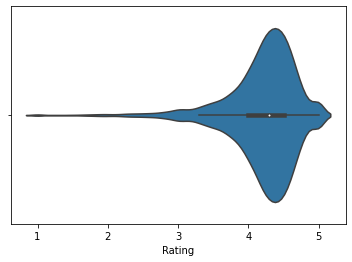

In [163]:
sns.violinplot(x=data['Rating'])

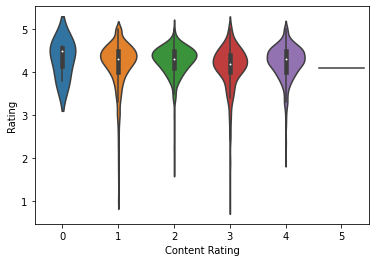

In [164]:
sns.violinplot(x='Content Rating', y='Rating', data=data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


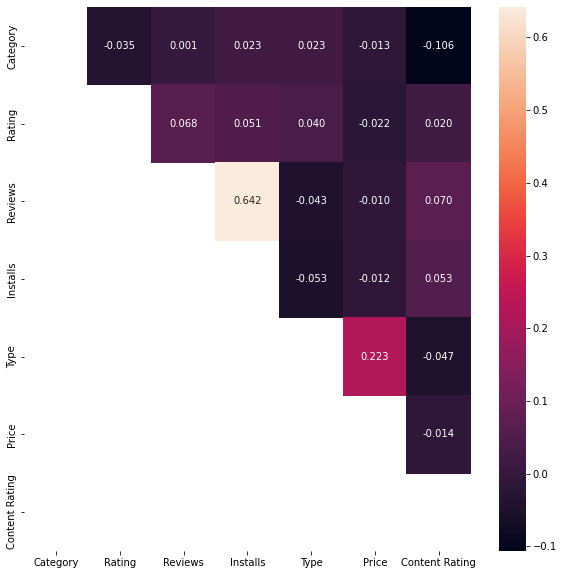

In [165]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,10))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

Вывод: В соответствии с корреляционной матрицей, можно сделать вывод, что с целевым признаком Rating остальные признаки слабо коррелируют. Из-за слабой связанности признаков между собой данный датасет мало пригоден к обучению модели.

Нецелевые признаки Reviews и Installs сильно коррелируют между собой, поэтому можно оставить только один - Installs